In [30]:
#선형 SVM 분류
#하드 마진분류 : 모든 샘플이 도로 바깥쪽으로 올바르게 분류

# 데이터가 선형적으로 구분되어 있어야함
# 이상치에 민감함

In [31]:
# 라지 마진 (도로의 폭을 가능한 넓게 유지하는 것) vs 마진오류 ( 샘플이 도로 중간이나 심지어 반대쪽에 있는경우) 사이에 적절한 균형 필요
# -> 소프트 마진분류 (사이킷런의 svm모델에서는 C 파라미터를 이용해 균형 조절 / c값 줄이면 도로의 폭이 넓어지지만, 마진오류도 커짐)

In [34]:
#기본설정
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'HCR Batang'
plt.rcParams['axes.unicode_minus'] = False

In [35]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from __future__ import division, print_function, unicode_literals


iris = datasets.load_iris()
X = iris["data"][:, (2,3)] #꽃의 길이, 꽃의 너비
y = (iris["target"] == 2).astype(np.float64) # iris-virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")) #하이퍼 파라미터 C=1 (svm이 과대적합이면 C를 감소시켜 모델 규제)
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [36]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [37]:
#SVC(kernel=”linear”, C=1)과 같이 SVC모델을 사용 가능 (큰 훈련세트에서 속도가 매우 느림)

#SGDClassifier(loss=”hinge”, alpha=1/(m * C)) (m은 샘플 수) 모델을 사용. 
#(큰 데이터 셋이나 온라인 학습으로 분류 문제를 다룰 때 유용)

#LinearSVC는 규제에 편향을 포함. 그래서 훈련 세트에서 평균을 빼서 중앙에 맞춰야 함.
#이 일을 StandardScaler() 로 하기. 그리고 loss 매개변수를 ‘hinge’로 지정해야 함.

In [38]:
#SVM분류기는 로지스틱 회귀 분류기와는 다르게 클래스에 대한 확률을 제공하지 않음

C:\Users\Schbi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


NameError: name 'plot_svc_decision_boundary' is not defined

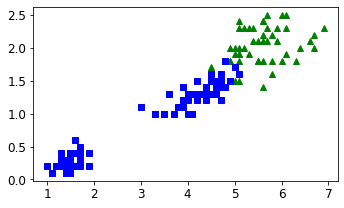

In [39]:
import matplotlib
import matplotlib.pyplot as plt

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# 스케일링이 되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

In [40]:
#비선형 SVM 분류
#비선형 데이터 셋을 다루는 방법 -> 다항특성과 같은 특성 추가

In [41]:
#moon 데이터셋을 사용해
#PolynomialFeatures 변화기와 StandardScaler, LinearSVC를 연결하여 Pipeline을 만들기

In [42]:
#다항 특성을 사용한 선형 SVM 분류기

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

X, Y = make_moons(n_samples=100, noise=0.15, random_state=42)


polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000, random_state=42))
    ])

polynomial_svm_clf.fit(X, Y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=2000,
                           random_state=42))])

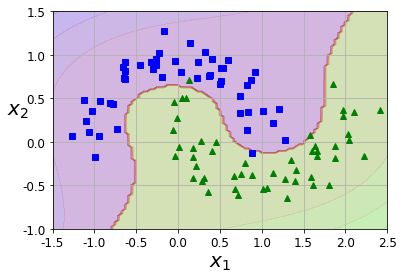

In [43]:
import numpy as np
from matplotlib import pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)#axes[0]부터 axes[1]까지 100개로 이루어진 숫자들 
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) #표현할 수 있는 모든 배열조합 
    X = np.c_[x0.ravel(), x1.ravel()]# ravel 1차원 배열로 핀다. 
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, Y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [44]:
#낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고, 높은차수의 다항식은 굉장히 많은 특성을 추가함으로 모델을 느리게한다.
#SVM의 경우 커널트릭을 이용하여 문제해결
#커널트릭 : 저차원 공간(low dimensional space)을 고차원 공간(high dimensional space)으로 매핑해주는 작업
#살제로 특성을 추가하지 않고도 특성을 많이 추가한 것 같은 효과를 냄

Text(0.5, 1.0, '$d=10, r=100, C=5$')

findfont: Font family ['HCR Batang'] not found. Falling back to DejaVu Sans.


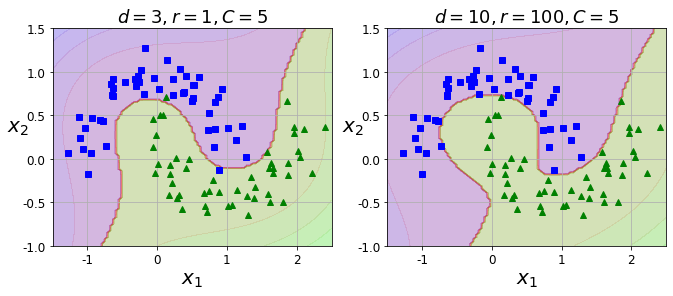

In [49]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, Y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, Y)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, Y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, Y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

In [50]:
# degree (d) : 차수
# coef0 (r) : 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절 
    #기본값은 0. 다항식 커널은 차수가 높아질수록 1보다 작은 값과 1보다 큰 값의 차이가 크게 벌어지므로 coef0을 적절한 값으로 지정하면,
    #고차항의 영향을 줄일수있음
# C (c) : C 값을 줄이면 도로의 폭이 넓어지지만, 마진 오류도 커짐

In [51]:
#비선형 데이터를 다루는 또다른 방법 -> 유사도 특성 추가
# 각 샘플이 특정 랜드 마크와 얼마나 닮았는지 측정

In [52]:
#유사도 함수로 가우시안 방사 기저 함수 사용(svm에서 대표적인 유사도함수)
#가우시안 RBF : ϕγ(x,ℓ)=exp(−γ∥x−ℓ∥2)
#감마(γ) 는 0보다 커야되고, 값이 작을수록 폭이 넓은 종모양  -> 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정 -> 규제의 역할
# ℓ 는 랜드마크의 지점
#가우시안 방사기저합수(RBF)는 γ=0.3

In [55]:
#가우시안 예시(수정하기)
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"유사도", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

NameError: name 'X1D' is not defined

In [ ]:
#랜드마크를 정하는 방법은?
#가장 간단한 방법은 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정, 
#이렇게 하면 차원이 매우 커지고 따라서 변환된 데이터셋이 선형적으로 구분될 가능성이 높아진다.

#단점: n개의 특성을 가진 m개의 샘플이, m개의 특성을 가진 m개의 샘플로 변환됨. 특성이 너무많아지면 모델학습속도가 느려진다.

In [ ]:
#방사기저함수는 추가 특성을 모두 계산해야 되어서 연산비용이 크고 계산이 오래걸린다
#--> 커널트릭 사용

#참고로, 커널 트릭 알고리즘의 경우 훈련 샘플 수가 클 경우 굉장히 느려 지기 때문에, 
#작거나 중간 규모의 훈련 set에 적합하다. 반면, 특성의 개수에 대해서는 잘 확장된다. 

Text(0.5, 1.0, '$gamma : 5, C=0.001$')

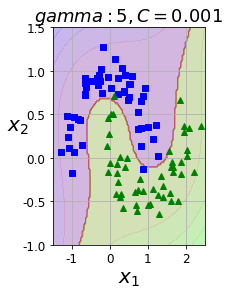

In [65]:
#커널 트릭으로 유사도 특성을 많이 추가한 것과 비슷한 결과를 실제로 특성을 추가하지 않고 얻을 수 있다.

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, Y)

plt.subplot(122)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, Y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma : 5, C=0.001$", fontsize=18)

In [70]:
#감마를 증가시키면 종모양 그래프(랜드마크)가 좁아져서 각 샘플의 영향 범위가 작아짐 -> 결정경계가 조금더 불규칙해지고 각 샘플을 따라 구불불하게 휘어짐
#감마가 감소되면 종모양 그래프가 넓어지고 샘플이 넓은 범위에 걸쳐 영향을 줌 -> 결정 경계가 더 부드러워짐
#-> 모델이 과대적합일 경우 감소 / 과소적합을떄는 증가 (C와 비슷)

In [ ]:
#어떤 커널부터 사용해야할까?
#선형 커널부터 시작 ( 훈련세트가 아주 크거나 특성 수가 많을 경우에)
#훈련세트가 너무 크지 않다면 가우시안 RBF 커널을 시도